# EEG Mini Viewer

This notebook shows how to **load, filter, and visualise EEG (brainwave) data** using Python and the `mne` library.

We’ll use a *sample dataset* that downloads automatically the first time you run it.  
No headset or extra files needed — everything runs on your laptop.

Steps:
1. Load the EEG recording  
2. Apply a simple 1–40 Hz filter to remove slow drift and high-frequency noise  
3. Plot a few seconds of raw signal  
4. Plot the power spectrum (which shows how much energy different frequencies have)

## Step 1 – Import libraries

We start by importing the libraries we’ll use:
- **mne** → tools for EEG/MEG data  
- **matplotlib** → for plotting graphs  

In [1]:
import mne
import matplotlib.pyplot as plt
from mne.datasets import sample

## Step 2 – Load the sample EEG data

`mne.datasets.sample.data_path()` downloads a small demo EEG recording.  
Then we tell MNE to read the file and store it in a variable called `raw`.  
`preload=True` loads everything into memory so we can process it easily.

In [2]:
data_path = sample.data_path()
raw_path = data_path / 'MEG' / 'sample' / 'sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(raw_path, preload=True, verbose=False)

## Step 3 – Filter the signal

We only keep brainwave frequencies between **1 Hz and 40 Hz**.  
This removes:
- very slow drifts (< 1 Hz)  
- muscle or electrical noise (> 40 Hz)

In [3]:
raw.pick(picks='eeg').filter(1., 40., fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1983 samples (3.302 s)



<Raw | sample_audvis_raw.fif, 60 x 166800 (277.7 s), ~79.3 MiB, data loaded>

## Step 4 – Visualise raw EEG

Here we plot **5 seconds** of EEG activity.  
Each line is one electrode on the scalp — you can see how the signals vary over time.

Using matplotlib as 2D backend.


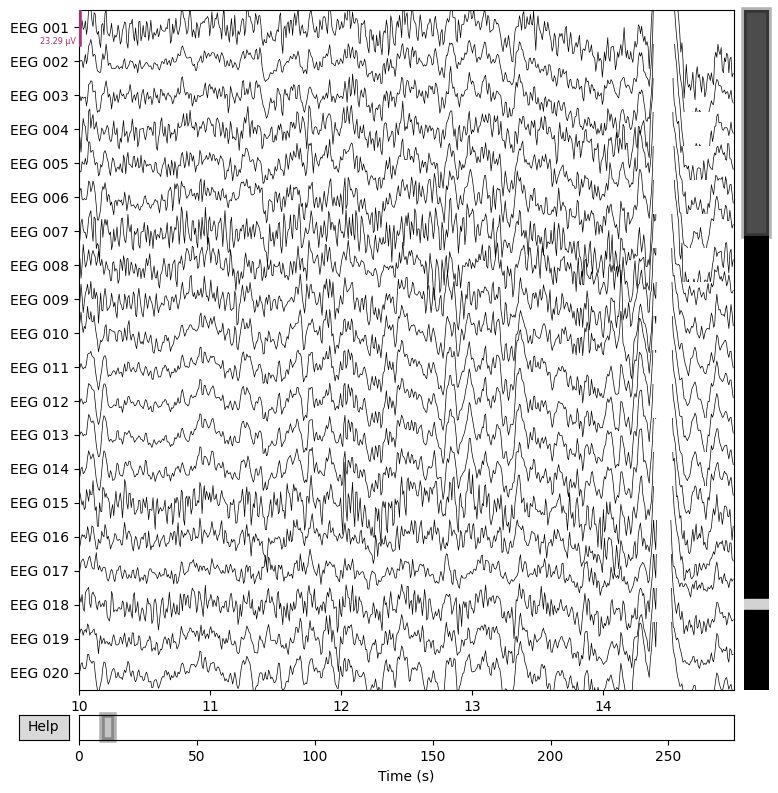

In [4]:
raw.plot(start=10, duration=5, scalings='auto', title='Raw EEG');

## Step 5 – Plot the Power Spectrum

The **Power Spectral Density (PSD)** shows how strong different frequency bands are.  
For example:
- Around 10 Hz → Alpha waves (relaxed, eyes closed)  
- Around 20 Hz → Beta waves (focused or active)

This gives a quick overview of what frequencies dominate the recording.

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


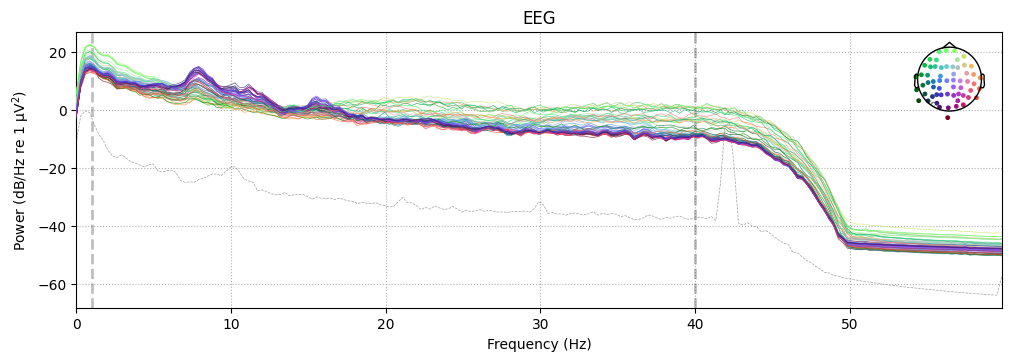

In [5]:
%matplotlib inline 
psd = raw.compute_psd(method='welch', picks='eeg', fmax=60)
fig = psd.plot(show=False) 
fig;                 

## 🎯 Summary

We:
1. Loaded a sample EEG file  
2. Filtered the signal between 1–40 Hz  
3. Visualised the raw EEG and its frequency spectrum  

You can now try changing parameters (e.g. filter range, duration) to see how the plots change!